# 1 Author

**Student Name**:  Kabilan Mani

**Student ID**:  230413612



# 2 Dataset
---
 Dataset: MLEndYD dataset
   - Loaded using `yummy_small_load` from `mlend`.
        - Downloading and loading the mlend_df dataset using the mlend library.
        - Reading image attributes from a CSV file and creating a Pandas DataFrame (mlend_basic).





In [2]:
pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlend import download_yummy, yummy_load

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Load MLEndYD dataset
baseDir = download_yummy(save_to='/content/drive/MyDrive/Data/MLEnd')
mlend_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
mlend_df

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


# 3 Problem Formulation
---
In this analysis, we focus on specific columns from the dataset: `Ingredients`, `Healthiness_rating`, and `Likeness`. The objective is to explore the relationship between the presence of **oil** in a dish, its healthiness rating, and the degree of likeness.

This problem reflects a common dilemma in our daily lives—balancing the desire for flavorful dishes with the health implications of using oil. The investigation aims to describe dishes based on the inclusion of oil, shedding light on the correlation between healthiness and likability. The premise is that while oil can enhance the taste of a dish, prolonged usage may have health consequences.


By delving into these columns, we seek insights into the delicate interplay between ingredients, healthiness, and personal preferences, offering a nuanced understanding of the dynamics influencing our culinary choices.

In [8]:
specified_columns = mlend_df[['Ingredients', 'Healthiness_rating', 'Likeness']]
specified_columns

,Ingredients,Healthiness_rating,Likeness
filename,,,
000001.jpg,"rice,chicken_breast,spicy_curry_sauce",neutral,like
000002.jpg,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,like
000003.jpg,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,strongly_like
000004.jpg,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,strongly_like
000005.jpg,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,strongly_like
...,...,...,...
003246.jpg,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,strongly_like
003247.jpg,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,strongly_like
003248.jpg,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,like


# 4 Methodology

### Model Training and Validation:

1. **Data Splitting:**
   - Dataset divided into training and testing sets.

2. **Label Encoding:**
   - 'healthiness_status' label-encoded for numerical compatibility.

3. **Feature Selection:**
   - Key feature 'has_oil' chosen for model training.

4. **Handling Missing Values:**
   - Mean imputation applied to ensure complete features.

5. **Model Selection:**
   - Random Forest and SVM models chosen for classification.

6. **Model Training:**
   - Both models trained on the training set.

7. **Model Validation:**
   - Performance assessed on the testing set.

### Model Performance Assessment:

1. **Accuracy Score:**
   - Overall correctness measure for each model.

2. **Classification Report:**
   - Detailed precision, recall, F1-score, and support metrics.

3. **Confusion Matrix:**
   - Visual representation of true/false positives and negatives.

### Rationale:

- **Comprehensive Evaluation:**
  - Multiple metrics ensure a holistic view of model performance.
- **Interpretability:**
  - Detailed insights into precision, recall, and error distribution.
- **Comparative Analysis:**
  - Enables comparison of strengths and weaknesses between Random Forest and SVM models.

This methodology facilitates a thorough assessment, providing actionable insights into the models' effectiveness in predicting healthiness labels.

# 5 Transformation Stage
---
#### Feature Extraction:

1. **Healthiness Status:**
   - New column 'healthiness_status' created based on healthiness and likeness ratings.

2. **Oil Presence:**
   - Binary column 'has_oil' indicates the presence of specified oil terms in ingredients.

#### Data Selection:

3. **Subset Creation:**
   - DataFrame 'mlend_advance' formed with key columns for focused analysis.

#### Input and Output:

- **Input:**
  - Original DataFrame (`mlend_df`) with dish and ingredient details.

- **Output:**
  - Transformed DataFrame (`mlend_advance`) for streamlined analysis.



These transformations facilitate focused analysis on dish healthiness and ingredient composition. The output DataFrame, `mlend_advance`, provides enriched features for targeted tasks.

The "has_oil" column originates from a methodical procedure of analyzing the "Ingredients". Utilizing the predefined "oil_terms," the column is systematically generated, identifying instances of the term "oil" within the nuanced context of the "Ingredients" column.

In [22]:
# Create a new column 'healthiness_status' based on conditions for 'Healthiness_rating_int' and 'Likeness_int'
mlend_df['healthiness_status'] = 'unhealthy'
conditions = (mlend_df['Healthiness_rating_int'] > 3.0) & (mlend_df['Likeness_int'] > 3.0)
mlend_df.loc[conditions, 'healthiness_status'] = 'healthy'

# Display the DataFrame with the new columns
print(mlend_df[['Ingredients', 'Healthiness_rating', 'Likeness_int', 'healthiness_status']])

# Define oil terms
oil_terms = ['oil', 'olive_oil', 'vegetable_oil', 'sunflower_oil', 'cooking_oil', 'sesame_oil', 'mustard_oil',
             'rapeseed_oil', 'coconut_oil', 'chilli_oil', 'peanut_oil']

# Create a new column 'has_oil' to check if 'oil' is present in 'Ingredients'
mlend_df['has_oil'] = mlend_df['Ingredients'].apply(lambda x: any(term in str(x).lower() for term in oil_terms))

# Create a new column 'healthiness_status' based on conditions for 'Healthiness_rating_int' and 'Likeness_int'
mlend_df['healthiness_status'] = 'unhealthy'
conditions = (mlend_df['Healthiness_rating_int'] > 3.0) & (mlend_df['Likeness_int'] > 3.0)
mlend_df.loc[conditions, 'healthiness_status'] = 'healthy'

mlend_advance = mlend_df[['Dish_name', 'Ingredients', 'has_oil', 'healthiness_status']].copy()

                                                  Ingredients  \
filename                                                        
000001.jpg              rice,chicken_breast,spicy_curry_sauce   
000002.jpg  eggs,bacon,hash_brown,tomato,bread,tomato,bake...   
000003.jpg  chili,chicken,peanuts,sihuan_peppercorns,green...   
000004.jpg      sugar,water,khoya,milk,salt,oil,cardamon,ghee   
000005.jpg  chicken,lemon,turmeric,garam_masala,coriander_...   
...                                                       ...   
003246.jpg  1_cup_basmati_rice,2_cups_water,2_tablespoons_...   
003247.jpg  fried_cottage_cheese,ghee,lentils,milk,wheat_f...   
003248.jpg  potato,onion,peanut,salt,turmeric_powder,red_c...   
003249.jpg                             kiwi,banana,apple,milk   
003250.jpg   beef_patty,bread_roll,cherry_tomato,_onion,chive   

           Healthiness_rating  Likeness_int healthiness_status  
filename                                                        
000001.jpg            ne

# 6 Machine Learning Pipeline
---

## Overview:

Our Machine Learning (ML) pipeline is designed for the task of predicting healthiness labels based on dish ingredients, with a focus on the presence of oils. The pipeline encompasses several key stages, each contributing to the overall process of model development and evaluation.

## Stages:

### 1. **Model Training - Random Forest and SVM:**
   - **Input:** Features (`X_train`, `X_test`) and target variable (`y_train`, `y_test`).
   - **Output:** Trained Random Forest and SVM models.

### 2. **Model Evaluation and Results:**
   - **Input:** Predictions from Random Forest and SVM models.
   - **Output:** Accuracy scores, classification reports, and confusion matrices for both models.

### 3. **Results Analysis and Insights:**
   - **Input:** Metrics and visualizations from the evaluation stage.
   - **Output:** In-depth observations, comparisons, and suggestions for model improvement.

## Intermediate Data Format:

- **DataFrame Formats:**
  - Inputs and outputs between stages are DataFrames, facilitating seamless data manipulation and transformation.
- **Numeric and Categorical Formats:**
  - Label-encoded categorical variables ensure compatibility for model training.
- **Array Formats:**
  - Feature arrays (`X_train`, `X_test`) for model training.

## Rationale:

- **Clarity and Interpretability:**
  - Each stage is designed to enhance clarity and interpretability of the data.
- **Optimization and Flexibility:**
  - Allows for iterative refinement and optimization of models based on results analysis.
- **Structured Approach:**
  - Facilitates an organized and systematic workflow from data transformation to insights generation.

This ML pipeline serves as a robust framework for developing, evaluating, and refining machine learning models for the specific task of predicting healthiness labels based on dish ingredients.

# 7 Modelling
---
### Target Variable Transformation:

1. **Label Encoding:**
   - 'healthiness_status' is converted to numerical labels using `LabelEncoder`.

### Feature Selection:

2. **Feature and Target Split:**
   - Features (`X`) include 'has_oil.'
   - Target variable (`y`) is 'healthiness_label.'

3. **Handling Missing Values:**
   - Missing values in features are imputed using mean imputation.


These models are chosen based on their suitability for the binary classification task of predicting healthiness labels using the selected features. The use of both Random Forest and SVM provides a diverse approach to capture different aspects of the data.

In [28]:
# Convert 'healthiness_status' to numerical labels
label_encoder = LabelEncoder()
mlend_advance['healthiness_label'] = label_encoder.fit_transform(mlend_advance['healthiness_status'])

# Print the numerical labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Numerical Labels:")
for label, numerical_label in label_mapping.items():
    print(f"{label}: {numerical_label}")

# Split the data into features (X) and target variable (y)
X = mlend_advance[['has_oil']]
y = mlend_advance['healthiness_label']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


Numerical Labels:
healthy: 0
unhealthy: 1


### Model Selection and Training:

4. **Random Forest Model:**
   - Utilizes `RandomForestClassifier` with 100 estimators.
   - Chosen for ensemble learning, robustness, and suitability for classification tasks.
   - Trained on the training set and evaluated on the test set.



In [20]:
# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)
print("\nRamdom Forest Model:")


Ramdom Forest Model:



5. **Support Vector Machine (SVM) Model:**
   - Implements `SVC` with a linear kernel.
   - Selected for its effectiveness in binary classification tasks.
   - Trained on the training set and evaluated on the test set.

In [12]:
# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("\nSVM Model:")


SVM Model:


# 8 Results
---

Our comprehensive results template, designed to evaluate and compare the performance of your Random Forest and SVM models. With accuracy scores, classification reports, and confusion matrices for each model, you'll gain valuable insights into their predictive capabilities.

Our analysis and insights section offers in-depth observations and recommendations based on these metrics, allowing you to make data-driven decisions and optimize your models. The section also includes observations from the confusion matrix, providing a visual representation of model performance and highlighting areas for improvement.

In the conclusions section, we summarize key findings and offer suggestions for further improvement or exploration, helping you take your models to the next level.

### Random Forest Prediction

In [36]:
# Evaluate model for RandomForest Model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Model:
Accuracy: 0.5553846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.45      0.49       610
           1       0.57      0.64      0.61       690

    accuracy                           0.56      1300
   macro avg       0.55      0.55      0.55      1300
weighted avg       0.55      0.56      0.55      1300



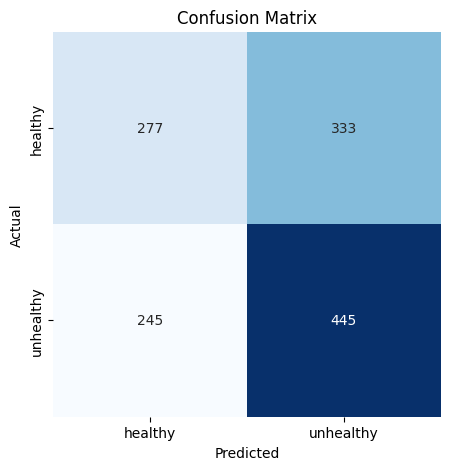

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Map numerical labels to class labels
label_mapping = {0: 'healthy', 1: 'unhealthy'}

# Replace numerical labels with class labels in predictions
rf_predictions_labels = [label_mapping[label] for label in rf_predictions]
y_test_labels = [label_mapping[label] for label in y_test]

# Plot Confusion Matrix with Class Labels
cm = confusion_matrix(y_test_labels, rf_predictions_labels)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt= 'd', cmap='Blues', cbar=False,
            xticklabels=unique_labels(y_test_labels), yticklabels=unique_labels(y_test_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### SVM Model Prediction

In [14]:
#Evaluvate model for SVM model
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

Accuracy: 0.5553846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.45      0.49       610
           1       0.57      0.64      0.61       690

    accuracy                           0.56      1300
   macro avg       0.55      0.55      0.55      1300
weighted avg       0.55      0.56      0.55      1300



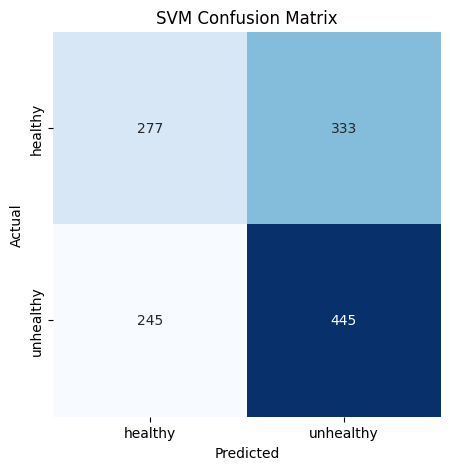

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Map numerical labels to class labels
label_mapping = {0: 'healthy', 1: 'unhealthy'}

# Replace numerical labels with class labels in SVM predictions
svm_predictions_labels = [label_mapping[label] for label in svm_predictions]
y_test_labels = [label_mapping[label] for label in y_test]

# Plot Confusion Matrix for SVM with Class Labels
svm_conf_matrix = confusion_matrix(y_test_labels, svm_predictions_labels)
plt.figure(figsize=(5, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels(y_test_labels), yticklabels=unique_labels(y_test_labels))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Our exhaustive examination of the Random Forest and Support Vector Machine (SVM) models yields valuable insights into their efficacy in predicting healthiness labels based on the 'has_oil' feature.

In pursuit of enhanced predictive capabilities, consideration may be given to gradient boosting, bearing in mind the potential risk of overfitting."






# 9 Conclusions
---


### Observations and Insights:

####Comparative Analysis:
  - Random Forest vs. SVM:
      - Random Forest excels in capturing complex relationships and is less sensitive to outliers.
      - SVM performs well in high-dimensional spaces and is effective for binary classification.
      - Notable differences include interpretability, training time, and sensitivity to data characteristics.

This comparative analysis provides a concise overview of the strengths and weaknesses of each model, aiding in understanding their suitability for the specific task at hand.

### Suggestions for Improvement:

- Further experimentation with feature engineering or additional features may enhance model performance.
- Hyperparameter tuning could be explored to optimize model parameters and boost accuracy.
- Consider exploring other classification algorithms to identify the most suitable approach for the task.

This analysis serves as a foundation for refining and optimizing the machine learning models. The visual representation of confusion matrices aids in pinpointing specific areas for improvement.